In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from  sklearn.datasets import load_iris

## Loading iris data

In [2]:
iris_data = load_iris()

In [3]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
data = iris_data["data"]
target = iris_data["target"]

In [5]:
## all features
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
## all classes
iris_data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df = pd.DataFrame(data, columns=iris_data["feature_names"])

In [8]:
df["classes"] = target

In [9]:
df.columns = df.columns.str.removesuffix("(cm)").str.strip()

In [10]:
df.head()

,sepal length,sepal width,petal length,petal width,classes
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Note:** Only selecting the Setosa and Versicolor classes

In [11]:
filter = (df["classes"] == 0) | (df["classes"] == 1)
df2 = df[filter]

In [12]:
df2.head()

,sepal length,sepal width,petal length,petal width,classes
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
data_x =  df2[["petal length", "petal width"]]
data_y =  df2["classes"] 

## Plotting the data with classes

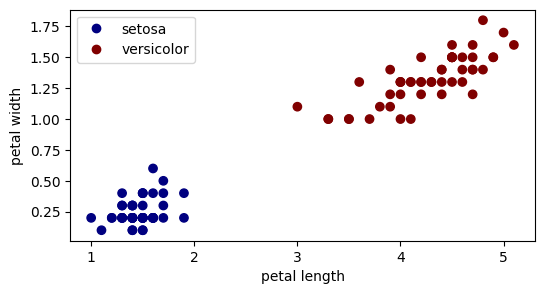

In [14]:
fig, ax = plt.subplots(figsize=(6,3))
scatter =  ax.scatter(data_x["petal length"], data_x["petal width"], c=data_y, cmap='jet')
legends, labels = scatter.legend_elements()
ax.legend(legends, ['setosa', 'versicolor'])
ax.set_xlabel("petal length")
ax.set_ylabel("petal width")
plt.show()

## Creating the SVC Model

In [15]:
svc_clf = SVC(kernel="linear", degree=1, C=1)

In [16]:
svc_clf.fit(data_x, data_y)

SVC(C=1, degree=1, kernel='linear')

In [17]:
svc_clf.coef_, svc_clf.intercept_

(array([[1.1, 0.7]]), array([-3.27999997]))

In [18]:
w = svc_clf.coef_[0]
b = svc_clf.intercept_[0]

In [19]:
w,b

(array([1.1, 0.7]), -3.2799999713897705)

In [20]:
## a/b, c/b
## y = mx +c 
## m = w[0]/w[1]
## c = c/w[1]
x0 = np.linspace(0,6.0,100)

y = -(w[0]*x0 + b)/w[1]

# 

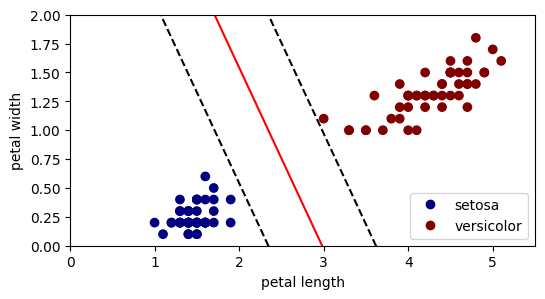

In [21]:
fig, ax = plt.subplots(figsize=(6,3))
scatter =  ax.scatter(data_x["petal length"], data_x["petal width"], c=data_y, cmap='jet')
legends, labels = scatter.legend_elements()
ax.legend(legends, ['setosa', 'versicolor'])



ax.plot(x0,y, color='red')
ax.plot(x0,y+1, "k--")
ax.plot(x0,y-1, "k--")

ax.set_xlabel("petal length")
ax.set_ylabel("petal width")
ax.axis([0,5.5, 0, 2])
plt.show()

### Points on SVM

1. What is SVM
2. descion Boundary
3. Margin Line
4. Support Vector
5. Margin Violation
6. Slack Variable
7. Hard Margin
8. Soft Margin

In [22]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

In [23]:
X, Y = make_blobs(centers=2, random_state=2, cluster_std=1.2)

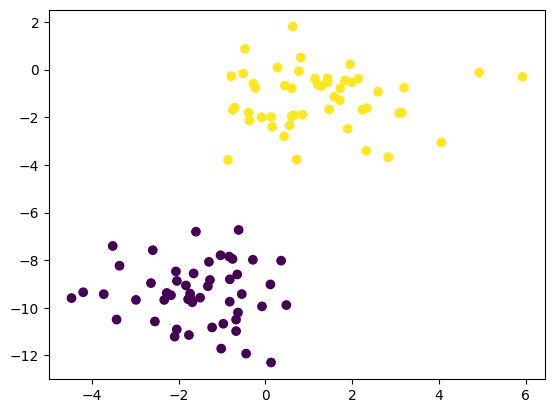

In [24]:
plt.scatter(X[:,0], X[:,1], c=Y)

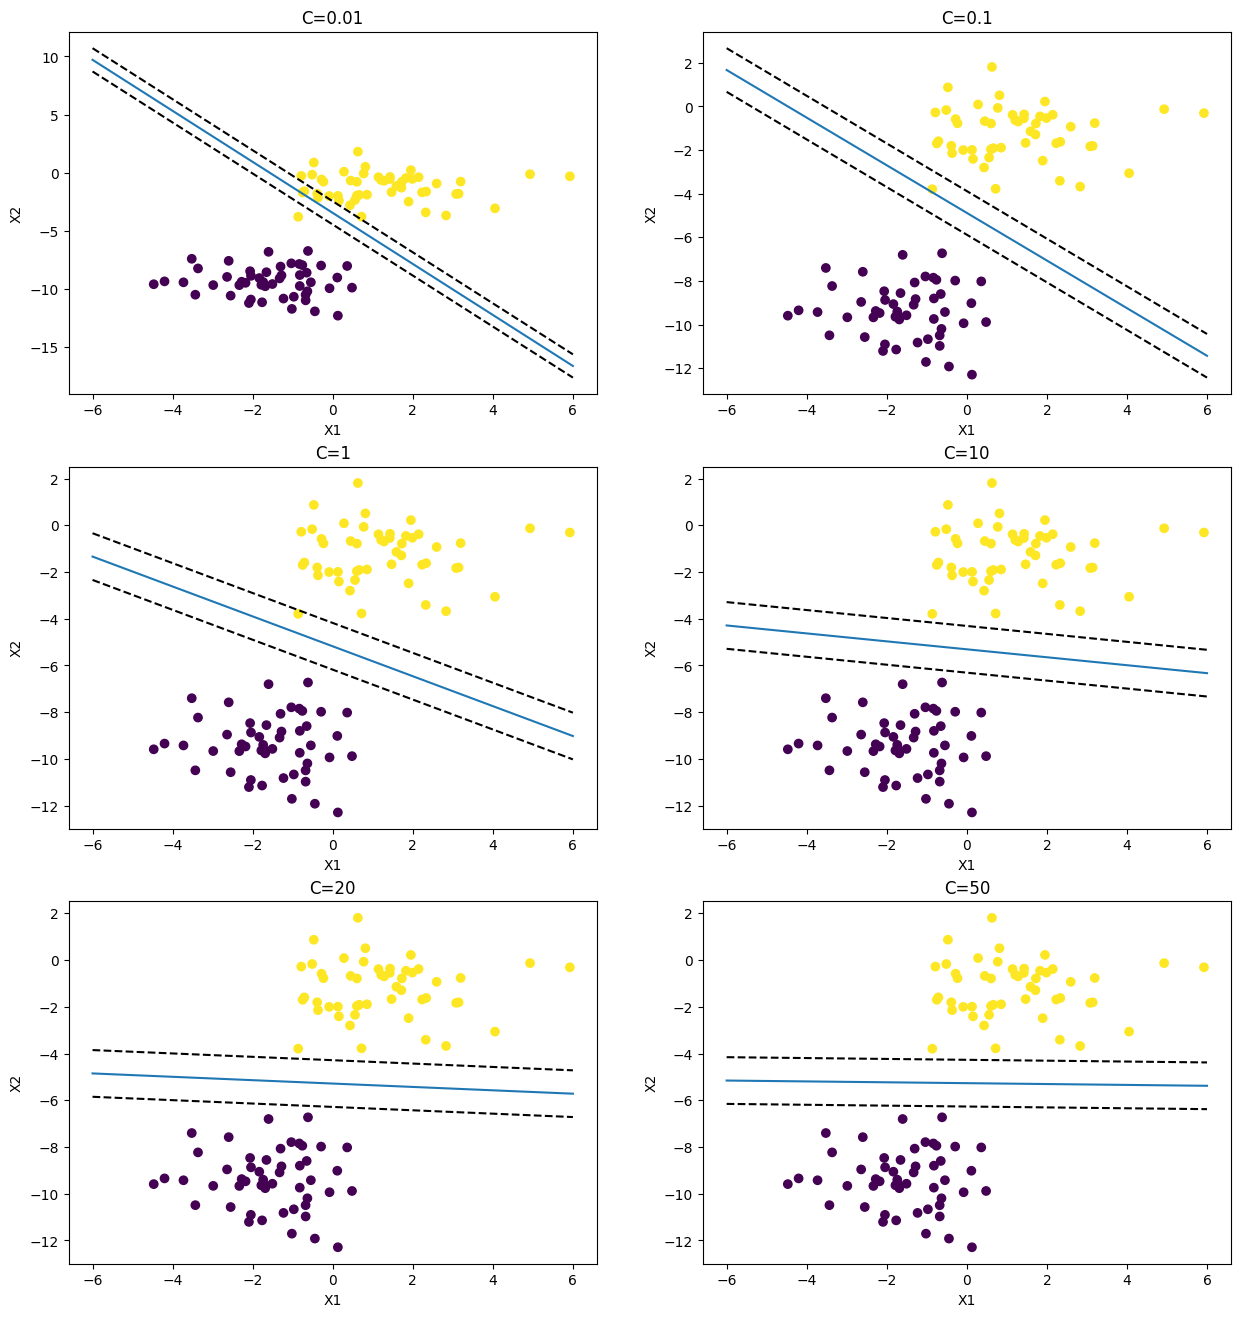

In [29]:

fig, axes = plt.subplots(3,2,figsize = (15,8*2))

for ax, c_ in zip(axes.flat, [0.01, 0.1, 1, 10, 20,50]):
    clf = LinearSVC(dual=False,C=c_)
    clf.fit(X,Y)
    
    W = clf.coef_[0]
    B = clf.intercept_[0]
    x0 = np.linspace(-6,6, 100)
    y = -(W[0]*x0 + B)/W[1]
    
    ax.scatter(X[:,0], X[:,1], c=Y)
    ax.plot(x0, y)
    
    # margin line
    ax.plot(x0, y+1, "k--")
    ax.plot(x0, y-1, "k--")

    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_title(f"C={c_}")

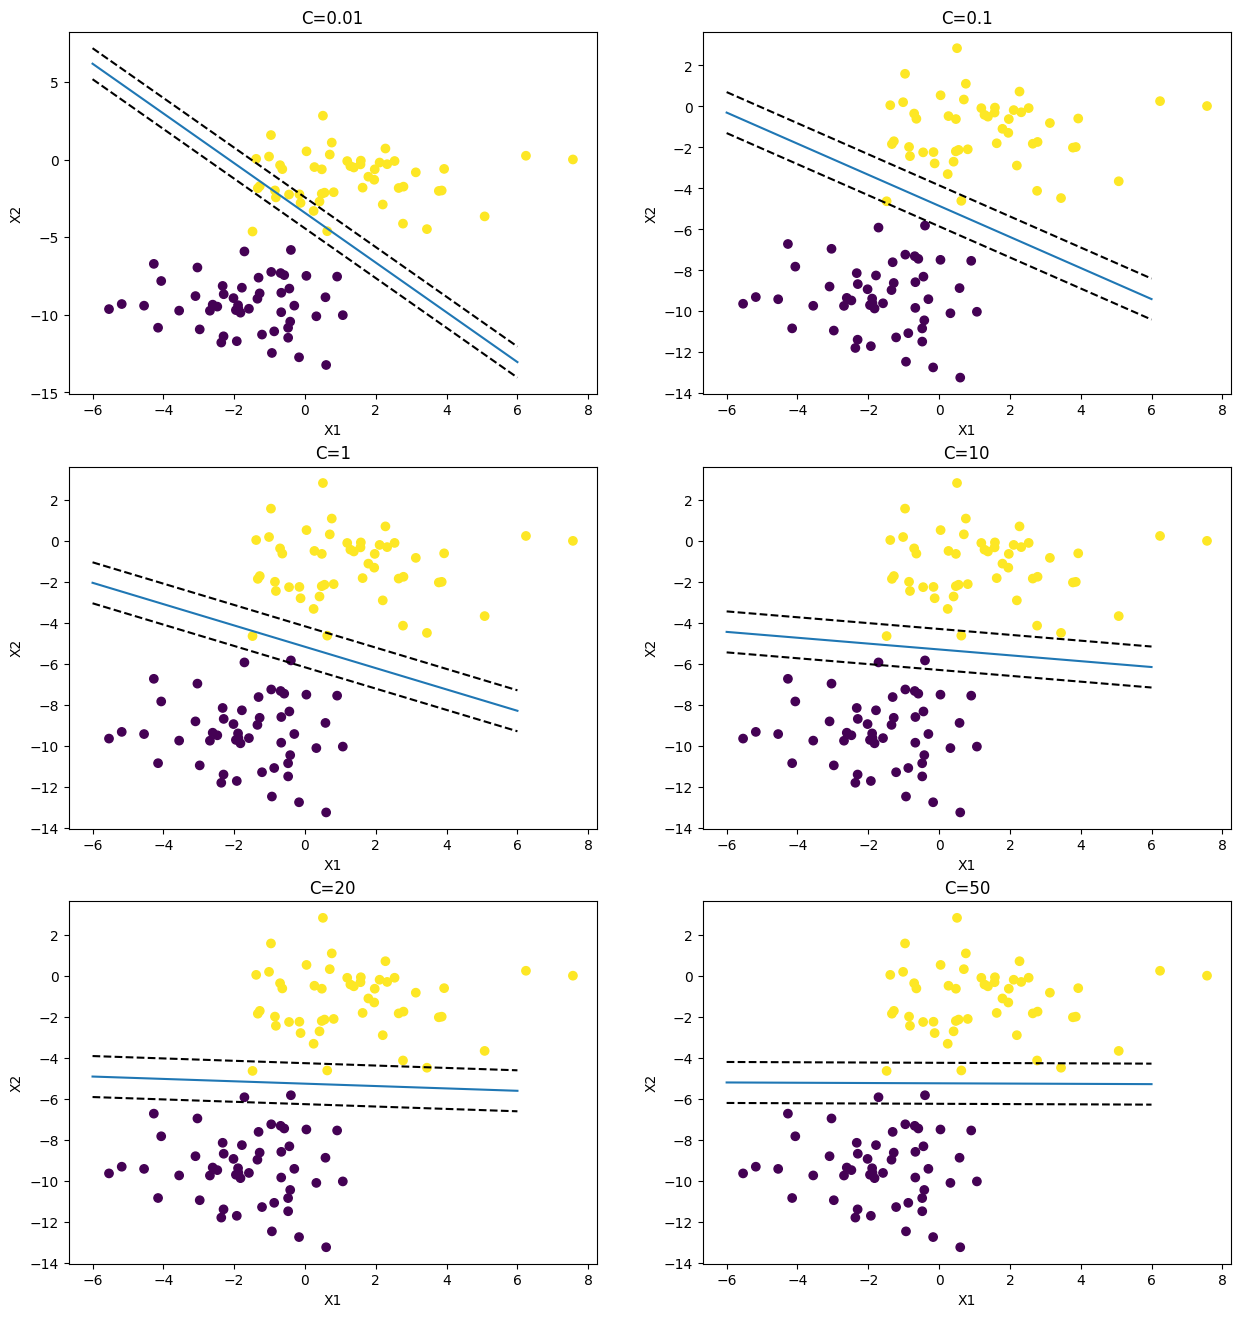

In [31]:
X, Y = make_blobs(centers=2, random_state=2, cluster_std=1.6)

fig, axes = plt.subplots(3,2,figsize = (15,8*2))

for ax, c_ in zip(axes.flat, [0.01, 0.1, 1, 10, 20,50]):
    clf = LinearSVC(dual=False,C=c_)
    clf.fit(X,Y)
    
    W = clf.coef_[0]
    B = clf.intercept_[0]
    x0 = np.linspace(-6,6, 100)
    y = -(W[0]*x0 + B)/W[1]
    
    ax.scatter(X[:,0], X[:,1], c=Y)
    ax.plot(x0, y)
    
    # margin line
    ax.plot(x0, y+1, "k--")
    ax.plot(x0, y-1, "k--")

    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_title(f"C={c_}")

## Descioin Regions Cluster

In [33]:
from sklearn.inspection import DecisionBoundaryDisplay

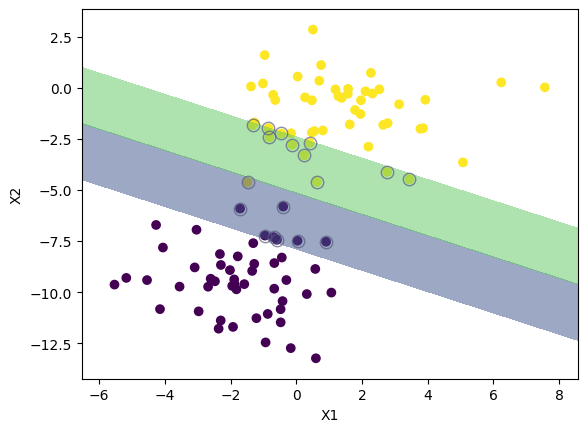

In [73]:
X, Y = make_blobs(centers=2, random_state=2, cluster_std=1.6)

clf = LinearSVC(dual=False,C=1)
clf.fit(X,Y)

z =  clf.decision_function(X)

W = clf.coef_[0]
B = clf.intercept_[0]
x0 = np.linspace(-6,6, 100)
y = -(W[0]*x0 + B)/W[1]

ax = plt.gca()

ax.scatter(X[:,0], X[:,1], c=Y)
# ax.plot(x0, y)

# # margin line
# ax.plot(x0, y+1, "k--")
# ax.plot(x0, y-1, "k--")

# ax.set_xlabel("X1")
# ax.set_ylabel("X2")
# ax.set_title(f"C={c_}")

disp = DecisionBoundaryDisplay.from_estimator(clf, X, ax=ax, 
                                              response_method='decision_function', alpha=0.5,
                                             levels=[-1,0,1], xlabel="X1", ylabel='X2'
                                             )

support_vector_index = np.abs(clf.decision_function(X)) <= 1 + 1e-15

support_vectors = X[support_vector_index]

ax.scatter(support_vectors[:,0], support_vectors[:,1], color='#0000', edgecolor='#55577Caa', s=80)

## Clustering 2nd Way

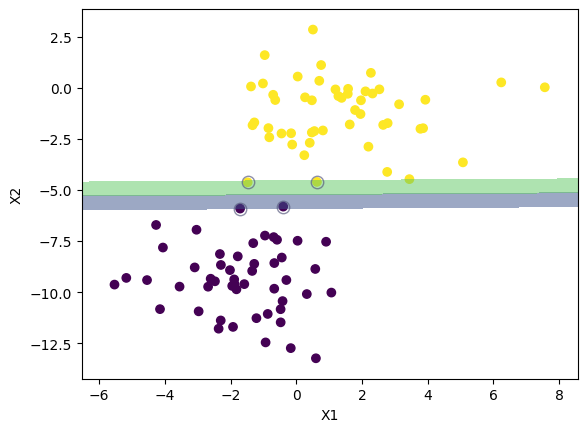

In [105]:
X, Y = make_blobs(centers=2, random_state=2, cluster_std=1.6)

clf = LinearSVC(dual=False,C=100)
clf.fit(X,Y)

z =  clf.decision_function(X)

x_ = np.linspace(-6.5, 8.5, 100)
y_ = np.linspace(1.5, -13.5, 100)

W = clf.coef_[0]
B = clf.intercept_[0]
x0 = np.linspace(-6,6, 100)
y = -(W[0]*x0 + B)/W[1]

ax = plt.gca()

ax.scatter(X[:,0], X[:,1], c=Y)
# ax.plot(x0, y)

# # margin line
# ax.plot(x0, y+1, "k--")
# ax.plot(x0, y-1, "k--")

# ax.set_xlabel("X1")
# ax.set_ylabel("X2")
# ax.set_title(f"C={c_}")

disp = DecisionBoundaryDisplay.from_estimator(clf, X, ax=ax, 
                                              response_method='decision_function', alpha=0.5,
                                             levels=[-1,0,1], xlabel="X1", ylabel='X2'
                                             )

support_vector_index = np.abs(clf.decision_function(X)) <= 1 + 1e-15

support_vectors = X[support_vector_index]

ax.scatter(support_vectors[:,0], support_vectors[:,1], color='#0000', edgecolor='#55577Caa', s=80)

(-6.5, 8.5, -13.5, 1.5)

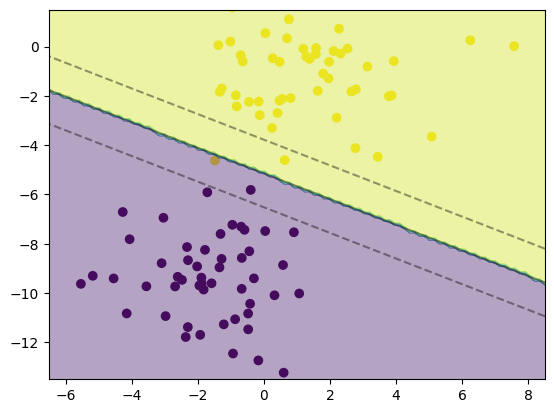

In [104]:
x_ = np.linspace(-6.5, 8.5, 100)
y_ = np.linspace(1.5, -13.5, 100)

z_contour =  clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
z_contour = z.reshape(xx.shape)

z_contourf = np.where(z_contour <=0, 0,1)

xx, yy =  np.meshgrid(x_,y_)
# plt.scatter(xx,yy, s=10)

plt.scatter(X[:,0], X[:,1], cmap=plt.cm.viridis, c=Y)

plt.contourf(xx,yy,z_contourf, alpha=0.4)
plt.contour(xx,yy,z_contour, alpha=0.4, levels=[-0.5,0,0.5], colors='k', linestyles=["--","-","--"])

plt.axis([-6.5,8.5,-13.5,1.5])

In [87]:
z.reshape(xx.shape)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [84]:
np.c_[xx.ravel(), yy.ravel()]

array([[ -6.5       ,   1.5       ],
       [ -6.34848485,   1.5       ],
       [ -6.1969697 ,   1.5       ],
       ...,
       [  8.1969697 , -13.5       ],
       [  8.34848485, -13.5       ],
       [  8.5       , -13.5       ]])